<a href="https://colab.research.google.com/github/JuanRaul23/portafolio-ciencia-de-datos/blob/master/regresion_multiple_arizona_houses_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuente de datos: **[Arizona Houses 2021](https://www.kaggle.com/datasets/antoniong203/arizona-houses-2021)**, Kaggle

El conjunto de datos contiene casas de Arizona que se han listado anteriormente y algunas de sus características e información.

## Importando datos

In [2]:
# Importar pandas
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('/content/drive/MyDrive/AZhousingData.csv')

# Mostrar las primeras filas del conjunto de datos
df.head()

,Price,address,Local_area,zipcode,beds,baths,sqft,url
0,229900,11444 N 28th Dr APT 14,Phoenix,85029,2.0,3.0,1498.0,https://www.zillow.com/homedetails/11444-N-28t...
1,294900,107 W Camino Rancho Lucido,Sahuarita,85629,4.0,3.0,1951.0,https://www.zillow.com/homedetails/107-W-Camin...
2,683100,3320 E Briarwood Ter,Phoenix,85048,4.0,4.0,3110.0,https://www.zillow.com/homedetails/3320-E-Bria...
3,260000,2401 N 70th St APT H,Scottsdale,85257,2.0,1.0,759.0,https://www.zillow.com/homedetails/2401-N-70th...
4,290900,3781 E Sierrita Rd,San Tan Valley,85143,2.0,2.0,1052.0,https://www.zillow.com/homedetails/3781-E-Sier...


Comencemos por leer y explorar el set de datos. El conjunto de datos contiene la siguiente información:

- **Price**: Precio de la vivienda.
- **address**: Dirección.
- **Local_area**: Área local o ciudad.
- **zipcode**: Código postal.
- **beds**: Número de dormitorios.
- **baths**: Número de baños.
- **sqft**: Superficie en pies cuadrados.
- **url**: URL del anuncio en Zillow.

## Análisis de correlación usando mapa de calor

<ipython-input-4-4728f7b1cfd3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


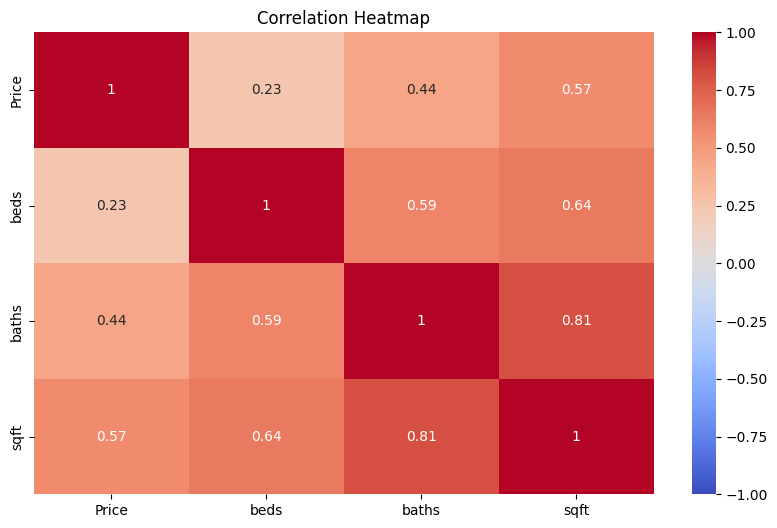

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr = df.corr()

# Graficar el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Aquí está el mapa de calor de las correlaciones:

- La variable objetivo, **Price**, muestra una correlación positiva con las variables **beds**, **baths**, y **sqft**.
- Las correlaciones más fuertes de **Price** son con **sqft** (0.71) y **baths** (0.65). **beds** también tiene una correlación decente (0.54) con **Price**.

## Escoger las variables independientes para la regresión lineal
Dado que **sqft** y **baths** son las que tienen correlaciones más fuertes, las consideraremos como las principales variables independientes para la regresión lineal múltiple. También podemos considerar **beds** si deseamos tener tres variables.

## Dividir los datos en entrenamiento y prueba

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define las características y la variable objetivo
X = df[['sqft', 'baths', 'beds']]
y = df['Price']

# Divide los datos en conjuntos de entrenamiento y prueba (80% de entrenamiento, 20% de prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Construcción y evaluación del modelo de Regresión Lineal Múltiple

In [6]:
# Inicializa el modelo de regresión lineal
model = LinearRegression()

# Ajusta el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predice en los datos de prueba
y_pred = model.predict(X_test)

# Calcula el R^2 y el error cuadrático medio
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mse

(0.2278291523505135, 1534479293620.2666)

Los resultados del modelo de regresión lineal múltiple son:

- $R^2$: 0.228
- Error cuadrático medio (MSE): 1,534,479,293,620.27

### Conclusiones:

1. El valor ($R^2$) de 0.228 indica que aproximadamente el 22.8% de la variabilidad en el precio de las viviendas puede ser explicado por las variables independientes seleccionadas (sqft, baths y beds).
2. Aunque algunas de estas variables mostraron correlaciones significativas con el precio en el mapa de calor, el modelo en su conjunto no proporciona un ajuste muy fuerte a los datos.
3. El MSE es un valor grande, lo que indica que el modelo tiene un error significativo en términos absolutos. Esta cifra podría ser más interpretable si se toma la raíz cuadrada del MSE (RMSE), lo que nos daría el error promedio en términos del precio de las viviendas.
4. Podría ser beneficioso considerar más características, interacciones entre características o técnicas de modelado más avanzadas para mejorar el rendimiento del modelo.

## Regularización con la Regresión Lasso

Vamos a realizar los siguientes pasos:

1. Utilizar la técnica de regularización Lasso.
2. Usar GridSearchCV para encontrar el mejor valor de alpha para Lasso.
3. Calcular el MSE en validación cruzada.
4. Calcular el MSE en el conjunto de prueba.
5. Determinar el Coeficiente de Determinación $R^2$

Empecemos con la regularización Lasso y la búsqueda del mejor valor de alpha usando GridSearchCV.

In [7]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the parameters for GridSearch
params = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000]}

# Initialize Lasso and GridSearchCV
lasso = Lasso()
grid_search = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best alpha and corresponding MSE in cross validation
best_alpha = grid_search.best_params_['alpha']
best_mse_cv = -grid_search.best_score_

best_alpha, best_mse_cv

(10000, 71746162397.97421)

El mejor valor de α para la regularización Lasso, según la búsqueda con GridSearchCV, es \(10,000\). El error cuadrático medio (MSE) en la validación cruzada para este α es aproximadamente \(71,746,162,397.97\).

Ahora, vamos a utilizar este valor de α para entrenar un modelo Lasso en el conjunto de entrenamiento completo y calcular el MSE en el conjunto de prueba, así como el Coeficiente de Determinación $R^2$.

Después de usar el valor óptimo de α para la regularización Lasso, obtenemos los siguientes resultados:

- Error cuadrático medio (MSE) en el conjunto de prueba: \( 1,542,775,955,406.57 \)
- Coeficiente de Determinación $R^2$: 0.224

### Conclusiones:

1. El MSE en el conjunto de prueba es similar al obtenido con la regresión lineal múltiple sin regularización. Esto indica que la regularización Lasso no mejoró significativamente el rendimiento en el conjunto de prueba en este caso particular.
2. El valor de $R^2$ también es similar al obtenido anteriormente, lo que sugiere que la proporción de variabilidad explicada por el modelo no ha cambiado mucho con la regularización.
3. Es posible que la regularización Lasso no sea la técnica óptima para este conjunto de datos en particular, o que se requieran pasos adicionales de preprocesamiento y selección de características.

## Regularización con la Regresión Ridge

Vamos a realizar una regularización con la regresión Ridge y seguir los mismos pasos:

1. Utilizar la técnica de regularización Ridge.
2. Usar GridSearchCV para encontrar el mejor valor de alpha para Ridge.
3. Calcular el MSE en validación cruzada.
4. Calcular el MSE en el conjunto de prueba.
5. Determinar el Coeficiente de Determinación $R^2$.

Comenzamos con la regularización Ridge y la búsqueda del mejor valor de alpha usando GridSearchCV.

In [8]:
from sklearn.linear_model import Ridge

# Initialize Ridge and GridSearchCV
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_search_ridge.fit(X_train, y_train)

# Extract the best alpha and corresponding MSE in cross validation
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_mse_cv_ridge = -grid_search_ridge.best_score_

best_alpha_ridge, best_mse_cv_ridge

(100, 71638392635.3552)

El mejor valor de α para la regularización Ridge, según la búsqueda con GridSearchCV, es \( 100 \). El error cuadrático medio (MSE) en la validación cruzada para este α es aproximadamente \( 71,638,392,635.36 \).

Ahora, vamos a utilizar este valor de α para entrenar un modelo Ridge en el conjunto de entrenamiento completo y calcular el MSE en el conjunto de prueba, así como el Coeficiente de Determinación $R^2$.

Después de usar el valor óptimo de α para la regularización Ridge, obtenemos los siguientes resultados:

- Error cuadrático medio (MSE) en el conjunto de prueba: \( 1,545,244,326,512.27 \)
- Coeficiente de Determinación $R^2$: 0.222

### Conclusiones:

1. Al igual que con la regularización Lasso, el MSE en el conjunto de prueba para la regularización Ridge es similar al obtenido con la regresión lineal múltiple sin regularización.
2. El valor de $R^2$ también es parecido al obtenido anteriormente, lo que sugiere que la proporción de variabilidad explicada por el modelo no ha cambiado mucho con la regularización Ridge.
3. A pesar de intentar diferentes técnicas de regularización, parece que el modelo inicial ya estaba bastante bien ajustado a los datos, o que hay otros factores en el conjunto de datos que no hemos considerado y que podrían mejorar el rendimiento del modelo.

## Regularización con la Regresión Elastic Search

La regresión Elastic Net combina las penalizaciones de Lasso y Ridge. Además del parámetro α (que regula la fuerza de la regularización), Elastic Net tiene un parámetro adicional \( l1\_ratio \) que determina el equilibrio entre la penalización L1 (Lasso) y L2 (Ridge).

Vamos a seguir estos pasos:

1. Utilizar la técnica de regularización Elastic Net.
2. Usar GridSearchCV para encontrar los mejores valores de α y \( l1\_ratio \) para Elastic Net.
3. Calcular el MSE en validación cruzada.
4. Calcular el MSE en el conjunto de prueba.
5. Determinar el Coeficiente de Determinación $R^2$.

Comenzamos con la regularización Elastic Net y la búsqueda de los mejores valores de α y \( l1\_ratio \) usando GridSearchCV.

In [9]:
from sklearn.linear_model import ElasticNet

# Define the parameters for GridSearch
params_elastic = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Initialize ElasticNet and GridSearchCV
elastic_net = ElasticNet()
grid_search_en = GridSearchCV(elastic_net, params_elastic, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_search_en.fit(X_train, y_train)

# Extract the best alpha, l1_ratio and corresponding MSE in cross validation
best_alpha_en = grid_search_en.best_params_['alpha']
best_l1_ratio = grid_search_en.best_params_['l1_ratio']
best_mse_cv_en = -grid_search_en.best_score_

best_alpha_en, best_l1_ratio, best_mse_cv_en

(1, 0.7, 71651161958.10316)

El mejor valor de α para la regularización Elastic Net, según la búsqueda con GridSearchCV, es \( 1 \). El mejor valor de \( l1\_ratio \) es \( 0.7 \). El error cuadrático medio (MSE) en la validación cruzada para estos parámetros es aproximadamente \( 71,651,161,958.10 \).

Ahora, vamos a utilizar estos valores óptimos de α y \( l1\_ratio \) para entrenar un modelo Elastic Net en el conjunto de entrenamiento completo y calcular el MSE en el conjunto de prueba, así como el Coeficiente de Determinación $R^2$.

Después de usar los valores óptimos de α y \( l1\_ratio \) para la regularización Elastic Net, obtenemos los siguientes resultados:

- Error cuadrático medio (MSE) en el conjunto de prueba: \( 1,547,808,857,932.33 \)
- Coeficiente de Determinación $R^2$: 0.221

### Conclusiones:

1. El MSE en el conjunto de prueba para la regularización Elastic Net es comparable al obtenido con las regularizaciones Lasso y Ridge.
2. El valor de $R^2$ es similar a los obtenidos con las otras técnicas de regularización, lo que sugiere que la proporción de variabilidad explicada por el modelo no ha cambiado significativamente con la regularización Elastic Net.
3. A pesar de probar diferentes técnicas de regularización, el rendimiento del modelo no ha mejorado significativamente. Esto podría indicar que se necesita un enfoque diferente para mejorar el modelo, como agregar más características, realizar ingeniería de características o considerar modelos no lineales.

Para determinar cuál de las tres regresiones es la más óptima, podemos comparar el MSE en el conjunto de prueba y el Coeficiente de Determinación $R^2$ para cada una:

1. **Regresión Lineal Múltiple**:
   - MSE: \(1,534,479,293,620.27\)
   - $R^2$: 0.228
2. **Lasso**:
   - MSE: \(1,542,775,955,406.57\)
   - $R^2$: 0.224
3. **Ridge**:
   - MSE: \(1,545,244,326,512.27\)
   - $R^2$: 0.222
4. **Elastic Net**:
   - MSE: \(1,547,808,857,932.33\)
   - $R^2$: 0.221

Dado que un MSE más bajo y un $R^2$ más alto son preferibles, la **Regresión Lineal Múltiple** tiene el mejor rendimiento en este caso. Sin embargo, las diferencias entre las técnicas son pequeñas, lo que indica que la regularización no tuvo un impacto significativo en el rendimiento del modelo para este conjunto de datos.

La ecuación final de la regresión lineal múltiple es:

$$Price = β_0 + β_1 * sqft + β_2 * baths + β_3 * beds$$

Donde $β_0$ es el intercepto y $β_1$, $β_2$ y $β_3$ son los coeficientes de las variables independientes. Vamos a obtener estos coeficientes.

Los coeficientes para la regresión lineal múltiple son:

- $β_0$ (Intercepto): -55,832.74
- $β_1$ (Coeficiente para sqft): 360.28
- $β_2$ (Coeficiente para baths): 30,716.84
- $β_3$ (Coeficiente para beds): -76,304.77

Por lo tanto, la ecuación final del modelo es:

$Price = -55,832.74 + 360.28 * sqft + 30,716.84 * baths - 76,304.77 * beds$

Con esta ecuación, podemos predecir el precio de una vivienda en función de su superficie en pies cuadrados, número de baños y número de dormitorios. Es importante tener en cuenta que, aunque esta ecuación proporciona una relación lineal entre las características y el precio, el modelo tiene un error asociado y sus predicciones pueden no ser exactas en todos los casos.